In [3]:
import requests, pickle
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
import tensorflow.keras.optimizers as optimizers
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from keras.src.layers import Dropout
from keras.src.regularizers import regularizers

### Carga de datos

In [4]:
'''url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
r = requests.get(url, allow_redirects=True)
open('./mnist1d_data.pkl', 'wb').write(r.content)'''

with open('./mnist1d_data.pkl', 'rb') as handle:
    data = pickle.load(handle)
    
data.keys()

dict_keys(['x', 'x_test', 'y', 'y_test', 't', 'templates'])

### Desempaquetado y normalización de los datos
MinMaxScaler de sklearn y OneHot encoder de autoría propia

In [5]:
import mios
x = data["x"]
x_test = data["x_test"]
y = data["y"]
y_test = data["y_test"]
y = mios.OneHot(y)
y_test = mios.OneHot(y_test)

scaler = MinMaxScaler()
scaler.fit(x)
scaler.transform(x)
scaler.transform(x_test)
print()

### Declaración de la red neuronal

In [4]:
DNN1 = Sequential()
DNN1.add(Dense(150, input_dim=40, activation='relu'))
DNN1.add(Dense(150, activation='relu'))
DNN1.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(0.001)

DNN1.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=adam,
              metrics=['accuracy'])

DNN1.summary()

C:\Users\Milo\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 150)            │         6,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,310 (118.40 KB)

 Trainable params: 30,310 (118.40 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [5]:
H = DNN1.fit(x, y, epochs=1000, validation_data=[x_test, y_test])

Epoch 1/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2254 - loss: 2.0592 - val_accuracy: 0.2930 - val_loss: 1.6865
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3671 - loss: 1.6090 - val_accuracy: 0.3720 - val_loss: 1.5406
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4747 - loss: 1.4155 - val_accuracy: 0.4430 - val_loss: 1.3752
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 1.2202 - val_accuracy: 0.5190 - val_loss: 1.2551
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6169 - loss: 1.1076 - val_accuracy: 0.5440 - val_loss: 1.1805
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - loss: 0.9745 - val_accuracy: 0.5670 - val_loss: 1.1294
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - loss: 0.9108 - val_accuracy: 0.5550 - val_loss: 1.1056
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6993 - loss: 0.8366 - 

### Graficación de comportamiento

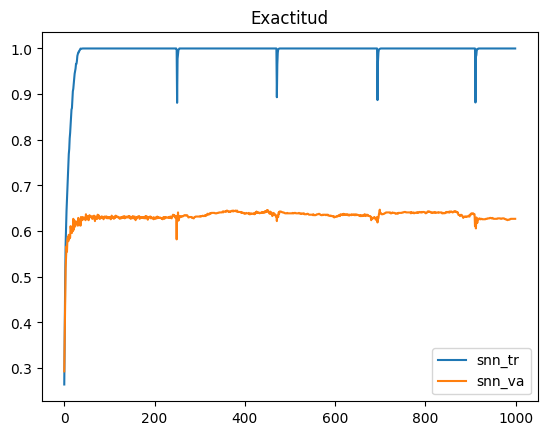

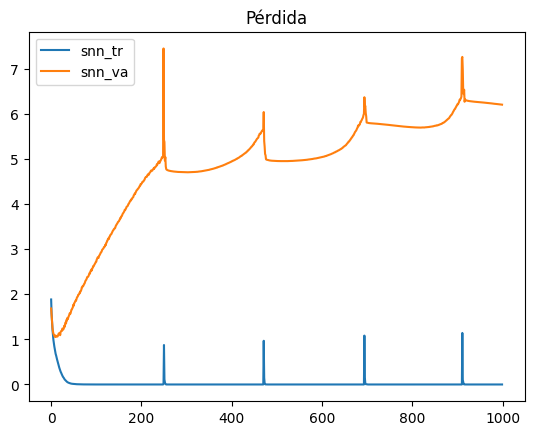

In [6]:
pyplot.title("Exactitud")
pyplot.plot(H.history['accuracy'], label='snn_tr')
pyplot.plot(H.history['val_accuracy'], label='snn_va')
pyplot.legend()
pyplot.show()

pyplot.title("Pérdida")
pyplot.plot(H.history['loss'], label='snn_tr')
pyplot.plot(H.history['val_loss'], label='snn_va')
pyplot.legend()
pyplot.show()

## Propuesta de mejora
Cambiar

In [6]:
DNN1_p = Sequential()
DNN1_p.add(Input(shape=(40,)))
DNN1_p.add(Dropout(0.2, input_shape=(40,)))
DNN1_p.add(Dense(150,activation='relu', activity_regularizer=regularizers.L2(0.00001)))
DNN1_p.add(Dense(150, activation='relu', activity_regularizer=regularizers.L2(0.00001)))
DNN1_p.add(Dense(10, activation='softmax'))

callbacks = [keras.callbacks.EarlyStopping(patience=200)]

# opti = optimizers.Adam(0.001)
opti = optimizers.SGD(learning_rate=0.05, momentum=0.01)

DNN1_p.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=opti,
              metrics=['accuracy'])

H_p = DNN1_p.fit(x, y, epochs=1000, validation_data=[x_test, y_test], callbacks=callbacks)

C:\Users\Milo\venv\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1833 - loss: 2.1816 - val_accuracy: 0.2730 - val_loss: 1.8086
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2960 - loss: 1.8208 - val_accuracy: 0.3330 - val_loss: 1.6963
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3401 - loss: 1.6994 - val_accuracy: 0.3590 - val_loss: 1.6314
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3610 - loss: 1.6606 - val_accuracy: 0.4190 - val_loss: 1.5598
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3877 - loss: 1.6048 - val_accuracy: 0.4410 - val_loss: 1.4816
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4217 - loss: 1.5479 - val_accuracy: 0.4440 - val_loss: 1.4343
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4384 - loss: 1.5153 - val_accuracy: 0.4840 - val_loss: 1.4099
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4550 - loss: 1.4565 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │         6,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,622 (236.81 KB)

 Trainable params: 30,310 (118.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,312 (118.41 KB)

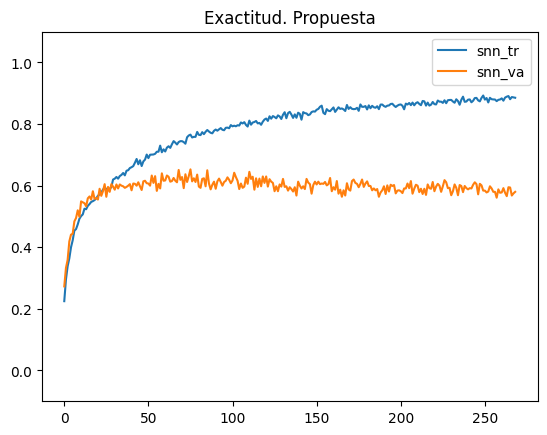

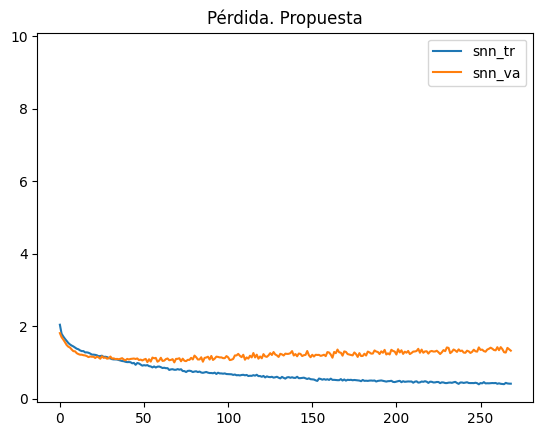

In [7]:
DNN1_p.summary()

pyplot.title("Exactitud. Propuesta")
pyplot.plot(H_p.history['accuracy'], label='snn_tr')
pyplot.plot(H_p.history['val_accuracy'], label='snn_va')
pyplot.ylim(-0.1,1.1)
pyplot.legend()
pyplot.show()

pyplot.title("Pérdida. Propuesta")
pyplot.plot(H_p.history['loss'], label='snn_tr')
pyplot.plot(H_p.history['val_loss'], label='snn_va')
pyplot.ylim(-0.1,10.1)
pyplot.legend()
pyplot.show()